**1. Load the Data**

In [16]:
import pandas as pd
df = pd.read_csv("/kaggle/input/hotels-operations-analysis/hotel_bookings.csv")
print(df.shape)
print(df.columns)
print(df.head())

(119390, 32)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel           

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**2. Check for Missing Values**

In [17]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percent', ascending=False))

          Missing Values    Percent
company           112593  94.306893
agent              16340  13.686238
country              488   0.408744
children               4   0.003350


**3. Data Types and Summary**

In [18]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**4. Target Variable - Cancellation Rate**

In [19]:
cancel_rate = df['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancel_rate:.2f}%")

Overall Cancellation Rate: 37.04%


**5. Target Variable - Cancellation Rate**

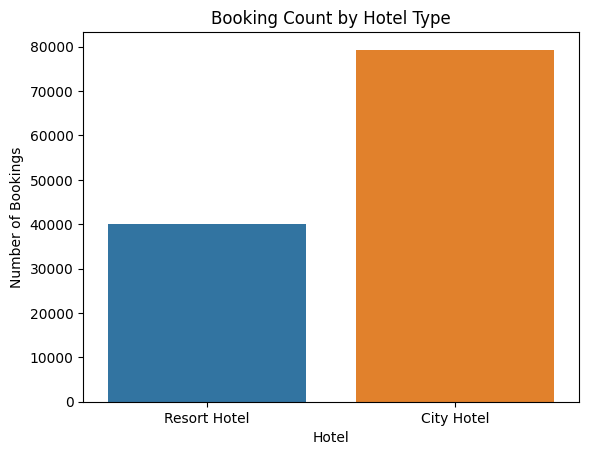

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='hotel')
plt.title("Booking Count by Hotel Type")
plt.ylabel("Number of Bookings")
plt.xlabel("Hotel")
plt.show()

**6. Monthy Booking Trends**

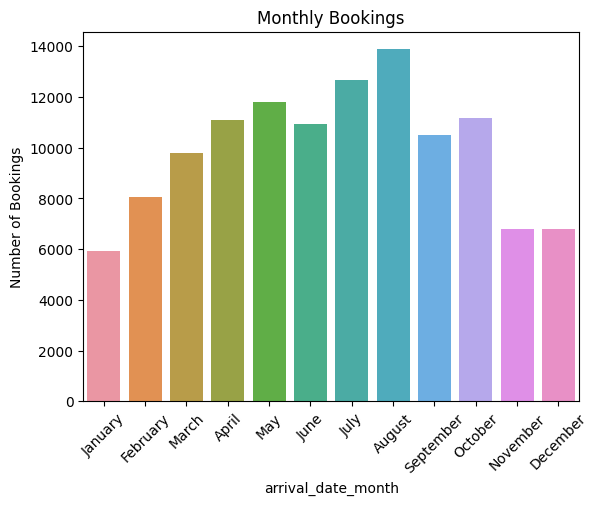

In [21]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='arrival_date_month', order=order)
plt.title("Monthly Bookings")
plt.xticks(rotation=45)
plt.ylabel("Number of Bookings")
plt.show()

**7. Lead Time Distribution**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


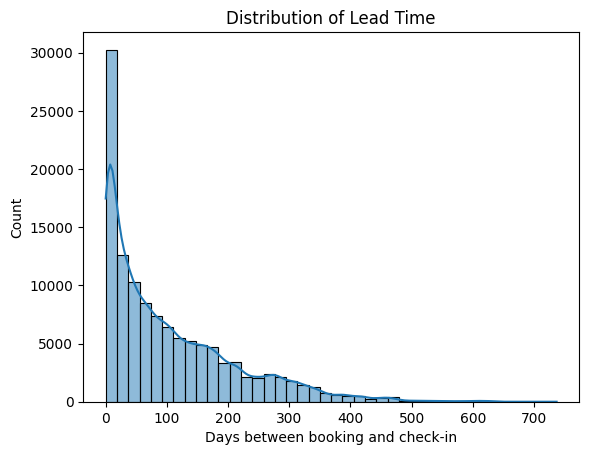

In [22]:
sns.histplot(df['lead_time'], bins=40, kde=True)
plt.title("Distribution of Lead Time")
plt.xlabel("Days between booking and check-in")
plt.show()

**8. ADR (Price per Night) Distribution**

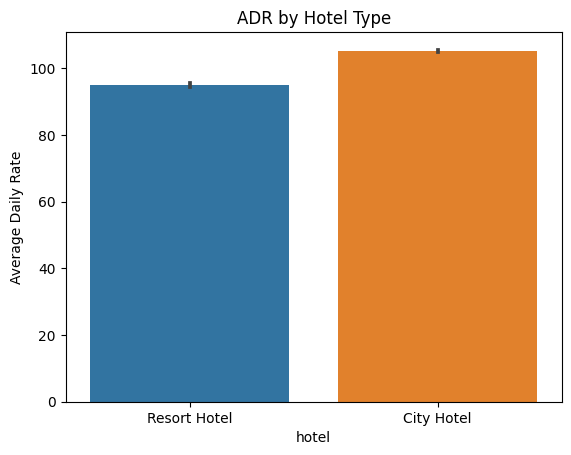

In [23]:
sns.barplot(data=df, x='hotel', y='adr')
plt.title("ADR by Hotel Type")
plt.ylabel("Average Daily Rate")
plt.show()

**9. Special Requests vs Cancellations**

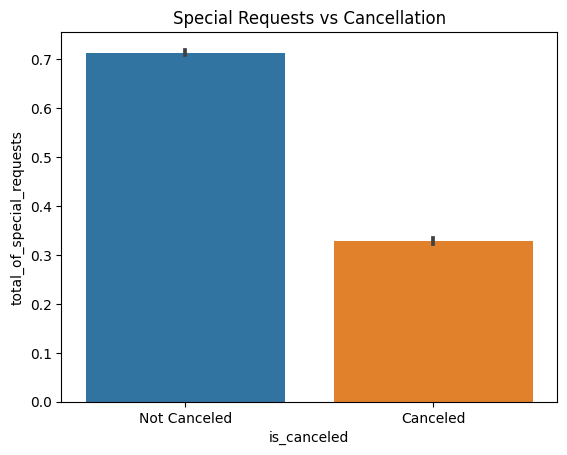

In [24]:
sns.barplot(data=df, x='is_canceled', y='total_of_special_requests')
plt.title("Special Requests vs Cancellation")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()